In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Question 1
### 1.1) Generating 400 different points from the distributions

In [86]:
# Creating 400 of each distribution to choose from
dataset1 = np.random.multivariate_normal([-1,1],np.eye(2,2),size=400)
dataset2 = np.random.multivariate_normal([-2.5,2],np.eye(2,2),size=400)
# Creating a list of randomly chosen samples from each dataset
combined = [(x1,y1,0)if np.random.random() <= 0.5 else (x2,y2,1) for (x1,y1),(x2,y2) in zip(dataset1,dataset2)]

### 1.2) Plotting the samples

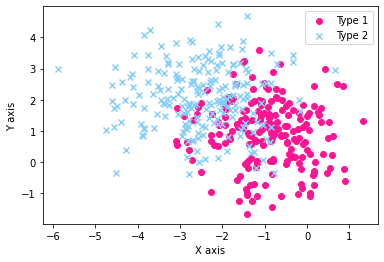

In [87]:
# Genrating the test set and their labels
test_set = np.array([(x,y) for x,y,label in combined])
test_label = np.array([label for x,y,label in combined])
x_1,y_1 = test_set[np.where(test_label == 0)].T
x_2,y_2 = test_set[np.where(test_label == 1)].T
colormap = np.array(['deeppink', 'lightskyblue'])

fig,ax = plt.subplots()
ax.scatter(x_1,y_1, marker='o',color='deeppink', label = "Type 1")
ax.scatter(x_2,y_2, marker='x',color='lightskyblue', label = "Type 2")

ax.legend()
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

### 1.3) Generating the test set and plotting 

In [88]:
# Creating 100 of each distribution to choose from
dataset1 = np.random.multivariate_normal([-1,1],np.eye(2,2),size=100)
dataset2 = np.random.multivariate_normal([-2.5,2],np.eye(2,2),size=100)
# Creating a list of randomly chosen samples from each dataset
combined = [(x1,y1,0)if np.random.random() <= 0.5 else (x2,y2,1) for (x1,y1),(x2,y2) in zip(dataset1,dataset2)]

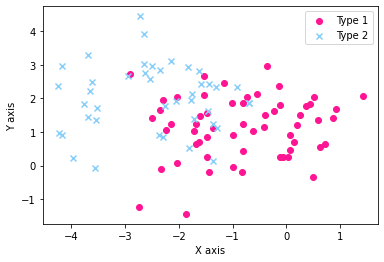

In [89]:
# Genrating the test set and their labels
test_set = np.array([(x,y) for x,y,label in combined])
test_label = np.array([label for x,y,label in combined])
x_1,y_1 = test_set[np.where(test_label == 0)].T
x_2,y_2 = test_set[np.where(test_label == 1)].T
colormap = np.array(['deeppink', 'lightskyblue'])

fig,ax = plt.subplots()
ax.scatter(x_1,y_1, marker='o',color='deeppink', label = "Type 1")
ax.scatter(x_2,y_2, marker='x',color='lightskyblue', label = "Type 2")
ax.legend()
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 1.4) Classifing the test set using KNN classifier

In [90]:
classifier = KNeighborsClassifier(1)
classifier.fit(train_set,train_label)
predictions = classifier.predict(test_set)
error_rate = sum(np.add(predictions,test_label) == 1)/len(predictions)
error_rate

0.25

### Classifing the training set using KNN classifier

In [91]:
classifier = KNeighborsClassifier(1)
classifier.fit(train_set,train_label)
predictions = classifier.predict(train_set)
error_rate = sum(np.add(predictions,train_label) == 1)/len(predictions)
error_rate

0.0

##### There is a relatively high difference between the error rates (24% as opposed to 0%)
The reason for that is that the model is overfitted for the training set. Since every sample is closest to itself, predicting the label for the train set is easy since that is what the model was trained for.
Finding the correct label for a new sample however, is not as accurate. In our case, as seen in the plot, there is an area in which the samples overlap, and relying on a single neighbor for a prediction will lead to inaccurate results.

### 1.5) Testing the effectiveness of different K values for the test_set and train_set

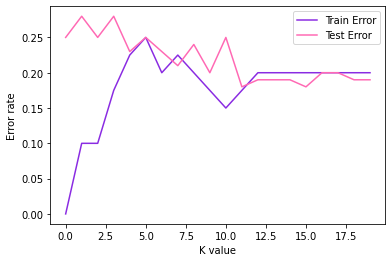

In [92]:
train_error = []
test_error = []
# For each k value, train the classifier and predict accordingly.
for k in range(1,21):
    classifier = KNeighborsClassifier(k)
    classifier.fit(train_set,train_label)
    predictions = classifier.predict(test_set)
    test_error.append(sum(np.add(predictions,test_label) == 1)/len(predictions))
    
    classifier = KNeighborsClassifier(k)
    classifier.fit(train_set,train_label)
    predictions = classifier.predict(train_set)
    train_error.append(sum(np.add(predictions,train_label) == 1)/len(predictions))

plt.plot(train_error,'blueviolet',label = "Train Error")
plt.plot(test_error, 'hotpink',label = "Test Error")
plt.ylabel("Error rate")
plt.xlabel("K value")
plt.legend()
plt.show()


###### Test_set error rate:
There is a slight decline in the error rate as K grows (It reaches the minimum value around K=9) and begins to rise for K>9.

The error rate for the test set isn't expected to decrease as K increases, an example of that is having unevenly distributed dataset, e.g: 
<br>
Let $\Sigma$ be a dataset $\Lambda$ be the label set, |$\Lambda$| = 2, let $\lambda_1,\lambda_2 \in \Lambda $ be the only labels in the label set, if the amount of elements of label $\lambda_1$ is much greater the those of $\lambda_2$ than having a large K will eventually start taking into consideration labels who should not have been taken into consideration when determining the label for a new element with a $\lambda_2$ true label


### 1.6) Trying different train sets

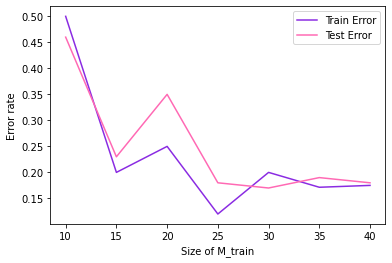

In [94]:
# Fixing K and Test set
K = 10
dataset1 = np.random.multivariate_normal([-1,1],np.eye(2,2),size=100)
dataset2 = np.random.multivariate_normal([-2.5,2],np.eye(2,2),size=100)
combined = [(x1,y1,0)if np.random.random() <= 0.5 else (x2,y2,1) for (x1,y1),(x2,y2) in zip(dataset1,dataset2)]
test_set = np.array([(x,y) for x,y,label in combined])
test_label = np.array([label for x,y,label in combined])

train_error = []
test_error = []

# Training set
for i in range(10,41,5):
    dataset1 = np.random.multivariate_normal([-1,1],np.eye(2,2),size=i)
    dataset2 = np.random.multivariate_normal([-2.5,2],np.eye(2,2),size=i)
    combined = [(x1,y1,0)if np.random.random() <= 0.5 else (x2,y2,1) for (x1,y1),(x2,y2) in zip(dataset1,dataset2)]
    train_set = np.array([(x,y) for x,y,label in combined])
    train_label = np.array([label for x,y,label in combined])

    #   Predicting using M_train_i
    classifier = KNeighborsClassifier(K)
    classifier.fit(train_set,train_label)

    predictions = classifier.predict(test_set)
    test_error.append(sum(np.add(predictions,test_label) == 1)/len(predictions))

    predictions = classifier.predict(train_set)
    train_error.append(sum(np.add(predictions,train_label) == 1)/len(predictions))

plt.plot([10,15,20,25,30,35,40],train_error,'blueviolet',label = "Train Error")
plt.plot([10,15,20,25,30,35,40],test_error, 'hotpink',label = "Test Error")
plt.ylabel("Error rate")
plt.xlabel("Size of M_train")
plt.legend()
plt.show()

### The results match our expectations
We expected that both the Train error and the Test error would decrease as the size of the the training set would increase. 
<br>
That for K=10 & M train < 20, the error rate would be high as the classifier relies on almost all of the data set, hence making close nieghbors irrelevent as we are taking far neighbors into consideration as well when determining a new label.
<br>
For larger training sets we expect the error rates to drop as we now have more samples to rely on when examining close neighbors.

### 1.7) Examining the plots after repeated trials

After running the code from previous question, we have seen that on the majority of the trials, the results were fairly similar to that of our first trial, although at times the results would not behave as we would expect. One example of that is the error rates radically decrease and then radically increase multiple times, but that would happen rarely and could be explained by the randomality of the samples at each iteration.


# Question 3